In [32]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
groseq_pos = '/data/pombo/rob/30kb_epigenetics/gro-seq.pos.bw'
groseq_neg = '/data/pombo/rob/30kb_epigenetics/gro-seq.neg.bw'
bin_locs = '/data/pombo/rob/projects/gam-follow-up-paper/data/raw/40kb_windows_named.bed'

In [9]:
!cat /data/pombo/rob/projects/gam-follow-up-paper/data/raw/40kb_windows.txt | awk '{print $0"\twindow_"NR}' > /data/pombo/rob/projects/gam-follow-up-paper/data/raw/40kb_windows_named.bed

In [11]:
!/home/rbeagrie/bin/bigWigAverageOverBed {groseq_pos} {bin_locs} groseq_pos_40kb.bed

processing chromosomes......................


In [12]:
!/home/rbeagrie/bin/bigWigAverageOverBed {groseq_neg} {bin_locs} groseq_neg_40kb.bed

processing chromosomes......................


In [27]:
groseq_vals = pd.merge(

    pd.read_csv(bin_locs, sep='\t', names=['chrom', 'start', 'stop', 'window_id'], index_col=3),
    
    pd.merge(

        pd.read_csv('groseq_pos_40kb.bed', sep='\t', index_col=0,
                    names=['window_id', 'len', 'covered', 'sum', 'pos_mean0', 'mean']
                   )[['pos_mean0']],

        pd.read_csv('groseq_neg_40kb.bed', sep='\t', index_col=0,
                    names=['window_id', 'len', 'covered', 'sum', 'neg_mean0', 'mean']
                   )[['neg_mean0']],
        left_index=True, right_index=True),
    
    left_index=True, right_index=True)

In [31]:
min(groseq_vals.pos_mean0[groseq_vals.pos_mean0 != 0])

0.00020000000000000001

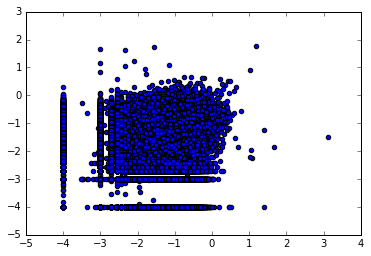

In [33]:
plt.scatter(np.log10(groseq_vals.pos_mean0 + 0.0001), np.log10((-groseq_vals.neg_mean0) + 0.0001))

In [42]:
groseq_vals['groseq_sum'] = groseq_vals.pos_mean0 - groseq_vals.neg_mean0

array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00,   1.00000000e+01])

([<matplotlib.axis.XTick at 0x7f37d9a91810>,
 <a list of 6 Text xticklabel objects>)

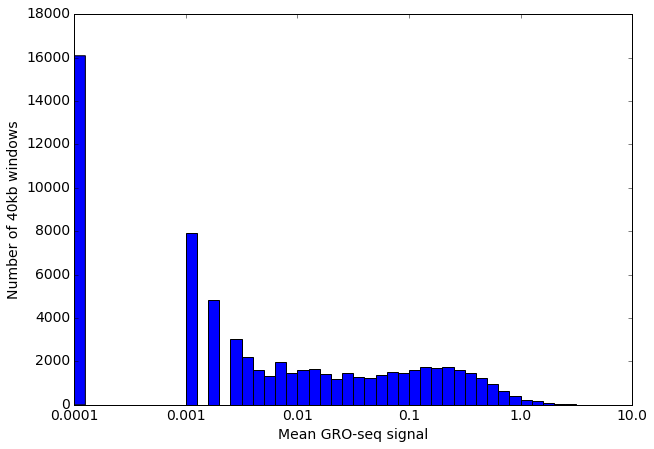

In [55]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(10,7))
_ = plt.hist(np.log10(groseq_vals.groseq_sum + 0.0001), bins=50, range=(-4,1))
plt.ylabel('Number of 40kb windows')
plt.xlabel('Mean GRO-seq signal')
plt.xticks(range(-4,2), 10**np.arange(-4.,2.))

In [47]:
groseq_vals[['chrom', 'start', 'stop', 'groseq_sum']].to_csv('/data/pombo/rob/projects/gam-follow-up-paper/data/intermediate/genomic-features/groseq.40kb_windows.bed', sep='\t', header=False, index=False)

In [48]:
!head /data/pombo/rob/projects/gam-follow-up-paper/data/intermediate/genomic-features/groseq.40kb_windows.bed

chr1	0	40000	0.0
chr1	40000	80000	0.0
chr1	80000	120000	0.0
chr1	120000	160000	0.0
chr1	160000	200000	0.0
chr1	200000	240000	0.0
chr1	240000	280000	0.0
chr1	280000	320000	0.0
chr1	320000	360000	0.0
chr1	360000	400000	0.0
